### Install and Import packages

In [2]:
!pip install yfinance

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
def portfolio_creation_and_optimization(stock_list,num_of_portfolios,risk_free):
    
    #Loading the data
    data = yf.download(stock_list, start= '2012-01-01', end = '2022-01-01', interval = '1mo')
    data = data['Adj Close']
    
    #taking log returns of the monthly data.
    returns = np.log(data).diff()
    
    #These are lists to store the respective metrics of all portfolios
    portfolio_return = []
    portfolio_risk = []
    portfolio_sharpe = []
    portfolio_weights = []
    
    # I have considered negative weights by assigning the minimum value od 0.1 or 10%
    low = -0.1
    k = len(stock_list) #Number of tickers
    
    #Covariance Matrix for the annual returns of each stock 
    covariance_matrix = returns.cov() * 12  # Multiplied by 12 to make annual returns
    for portfolio_len in range(num_of_portfolios):
        a = np.random.rand(k)
        a = (a/a.sum()*(1-low*k)) #division factor to generate random numbers that have both postive and neagtive values sum to 1
        weights = a + low 

        #checking if the sum is 1
        assert np.isclose(weights.sum(), 1)

        portfolio_weights.append(weights)

      #calculating mean returns (multiplying by 12 because we have monthly returns data to make it annualized i am multiplying by 12)
        annualized_returns = np.sum(returns.mean() * weights) * 12
        portfolio_return.append(annualized_returns)

      #matrix covariance and portfolio_variance
        portfolio_variance = np.dot(weights.T,np.dot(covariance_matrix,weights))

      #To calculate sharpe we need portfolio standard deviation 
        portfolio_stdev = np.sqrt(portfolio_variance)
        portfolio_risk.append(portfolio_stdev)

      #sharpe ratio for returns and standard deviation considering risk free rate as 0%
        sharpe_ratio = (annualized_returns - risk_free)/portfolio_stdev
        portfolio_sharpe.append(sharpe_ratio)
    
    #Converting every parameter into a dataframe
    data = pd.DataFrame({'Return': portfolio_return,'Risk': portfolio_risk, 'Sharpe': portfolio_sharpe, 'Weights': portfolio_weights})
    
    #These lines will give the min and max rows which has min risk, max return and max sharpe.
    minimum_risk = data.iloc[data['Risk'].idxmin()]
    maximum_return = data.iloc[data['Return'].idxmax()]
    maximum_sharpe = data.iloc[data['Sharpe'].idxmax()]
    
    #These lines will print the weights and the parameters in a good way above the portfolio visualizations.
    print('Lowest Risk')
    a = []
    for i,j in zip(stock_list,minimum_risk.Weights):
        element = str(i)+' : '+str(j)
        a.append(element)
    print(a)
    print(minimum_risk)
    print('')

    print('Maximum Return')
    b = []
    for i,j in zip(stock_list,maximum_return.Weights):
        element = str(i)+' : '+str(j)
        b.append(element)
    print(b)
    print(maximum_return)
    print('')

    print('Maximum Sharpe')
    c = []
    for i,j in zip(stock_list,maximum_sharpe.Weights):
        element = str(i)+' : '+str(j)
        c.append(element)
    print(c)
    print(maximum_sharpe)
    print('')
    
    #This function will return visualizations of the 10000 portfolios that we created above.
    return portfolio_visualizations(portfolio_return,portfolio_risk,portfolio_sharpe,maximum_sharpe,risk_free)

def portfolio_visualizations(portfolio_return,portfolio_risk,portfolio_sharpe,maximum_sharpe,risk_free):
    plt.figure(figsize=(12,8))
    df_cal = capital_allocation_line(maximum_sharpe,risk_free)
    #Scatter plot x = portfolio_risk, y = portfolio_return and the points are the sharpe ratio.
    plt.scatter(portfolio_risk,portfolio_return,c=portfolio_sharpe, label = 'Sharpe Ratio')
    plt.plot(df_cal.Risk,df_cal.Return,color = 'r', label = 'CAL')
    plt.title('Portfolio Optimization and capital allocaltion line')
    plt.xlabel('Volatality')
    plt.ylabel('Return')
    plt.colorbar(label = 'Sharpe Ratio')
    plt.legend(loc = 'upper left')
    plt.show()
    
def capital_allocation_line(maximum_sharpe,rf):
    weights = [0,1]
    return_p = []
    risk_p = []
    for w in weights:
        returns = w*maximum_sharpe.Return + (1-w)*rf
        risk = w*maximum_sharpe.Risk
        return_p.append(returns)
        risk_p.append(risk)
    cal_df = pd.DataFrame({'Weight': weights, 'Return': return_p, 'Risk': risk_p})
    return cal_df
    

### Stock list and graph output

In [22]:
stock_list = ['BA','AAPL','HD', 'BAC', 'SBUX', 'RTX','XOM','BBY','HOG','IHG']

[*********************100%***********************]  10 of 10 completed
Lowest Risk
['BA : 0.03410255292733913', 'AAPL : 0.11688002422360724', 'HD : -0.029575113869306197', 'BAC : 0.1502828718253327', 'SBUX : 0.22426519276557386', 'RTX : 0.2103450886075021', 'XOM : -0.07550563068737139', 'BBY : -0.08688046333090446', 'HOG : 0.4355727545838972', 'IHG : 0.02051272295432957']
Return                                              0.228852
Risk                                                0.146228
Sharpe                                              1.565034
Weights    [0.03410255292733913, 0.11688002422360724, -0....
Name: 6114, dtype: object

Maximum Return
['BA : 0.5958483463778635', 'AAPL : -0.003052341838018155', 'HD : 0.21557432565613352', 'BAC : 0.02455122784477702', 'SBUX : 0.1823076961686181', 'RTX : -0.027060810587074657', 'XOM : 0.025751154458656084', 'BBY : -0.08722331510395431', 'HOG : 0.15986983921259304', 'IHG : -0.0865661221895942']
Return                                      

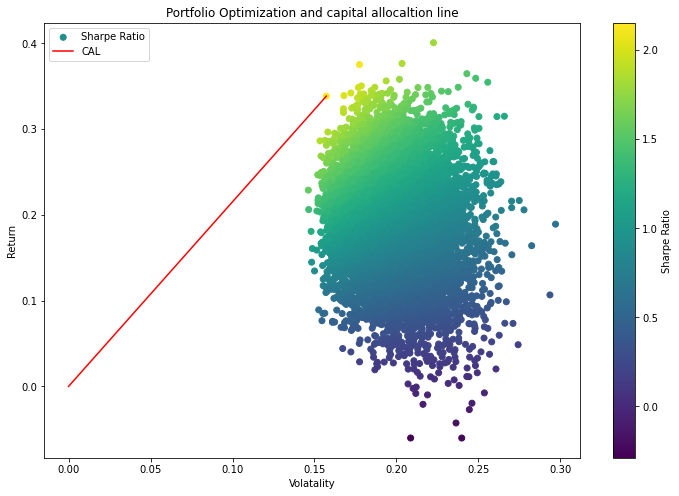

In [32]:
#parameters 
# stock_list
# number of portfolios
# risk-free rate = 0.0%
portfolio_creation_and_optimization(stock_list,10000,0)

[*********************100%***********************]  10 of 10 completed
Lowest Risk
['BA : 0.14473465907657682', 'AAPL : -0.01687032471693889', 'HD : -0.03999646265768357', 'BAC : 0.17229789334348786', 'SBUX : 0.3001219327586504', 'RTX : 0.058987498947103895', 'XOM : -0.07385357689967889', 'BBY : -0.0684876560778042', 'HOG : 0.28286798092900156', 'IHG : 0.2401980552972848']
Return                                                0.1833
Risk                                                0.142657
Sharpe                                              1.270881
Weights    [0.14473465907657682, -0.01687032471693889, -0...
Name: 5629, dtype: object

Maximum Return
['BA : 0.3158908857403593', 'AAPL : 0.3314059467305571', 'HD : 0.46272393881977925', 'BAC : 0.01027113728226417', 'SBUX : 0.0194084795617622', 'RTX : -0.09891176622062076', 'XOM : -0.08225819963220347', 'BBY : -0.047654330040125786', 'HOG : 0.1844409102701006', 'IHG : -0.09531700251187274']
Return                                        

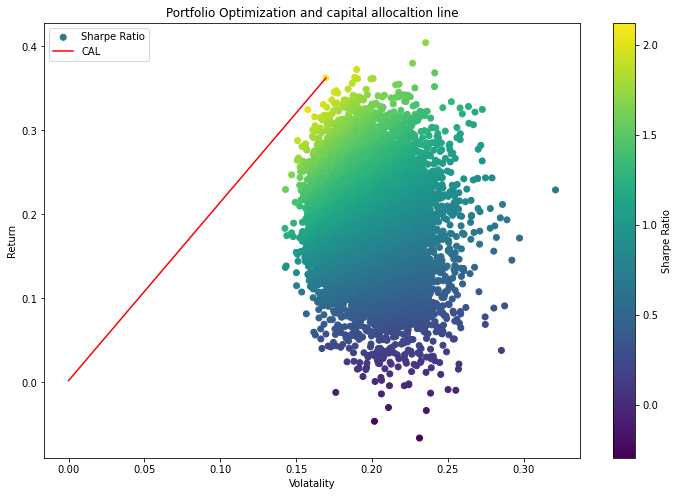

In [33]:
#parameters 
# stock_list
# number of portfolios
# risk-free rate = 0.2%
portfolio_creation_and_optimization(stock_list,10000,0.002)

[*********************100%***********************]  10 of 10 completed
Lowest Risk
['BA : 0.15898624399184738', 'AAPL : 0.03315372624850643', 'HD : -0.03486035495197465', 'BAC : 0.07217196154098685', 'SBUX : 0.3507549570870173', 'RTX : 0.021027383669265348', 'XOM : -0.05570426927219802', 'BBY : -0.07441485719854958', 'HOG : 0.3606820962337298', 'IHG : 0.16820311265136914']
Return                                              0.221091
Risk                                                0.141993
Sharpe                                              0.852799
Weights    [0.15898624399184738, 0.03315372624850643, -0....
Name: 4309, dtype: object

Maximum Return
['BA : 0.2775991104711142', 'AAPL : 0.12232458274279026', 'HD : 0.21693378246117792', 'BAC : 0.190962235288012', 'SBUX : 0.15686081825662881', 'RTX : -0.0773079988039822', 'XOM : 0.0012431573709744126', 'BBY : -0.049645206714888014', 'HOG : 0.24708170717710917', 'IHG : -0.08605218824893672']
Return                                       

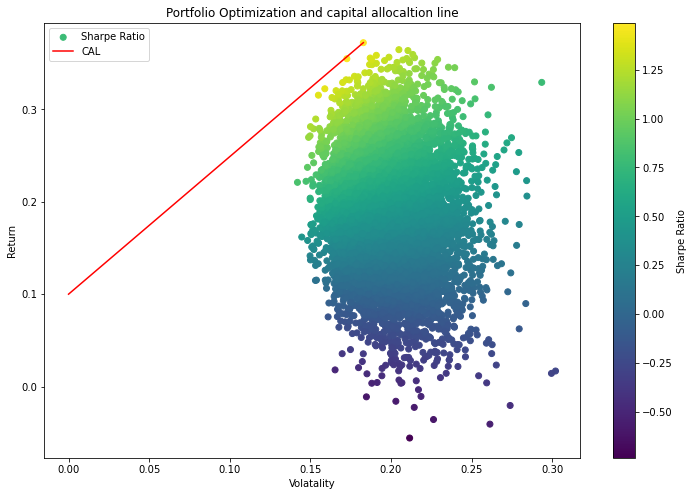

In [34]:
#parameters 
# stock_list
# number of portfolios
# risk-free rate = 10%
portfolio_creation_and_optimization(stock_list,10000,0.1)
